## Introduction to ML - Unsupervised Learning Example for Beginners using K-means clustering & PCA

## Tutorial Overview

What is Machine Learning in a nutshell
What is Supervised Learning (Supervised Vs Unsupervised Learning)
Problem formulation - What are we trying to solve?
Explaining how the whole automated process will work (Excel -> SQL -> Python -> SQL -> Power BI)
Loading the Raw Data into Python
Cleaning the Raw Data
What is Kmeans
Running Kmeans
Running PCA
Ways to improve results
Running Kmeans with optimal parameters
Creating the front end PowerBI Dashboard
Creating Insights from Clusters
Creating NPS analytics per Cluster
Discussing how these results can be used in real life

## 1. What is Machine Learning (ML) in a nutshell
         “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)
    ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions
    ML is a subset of Artificial Intelligence

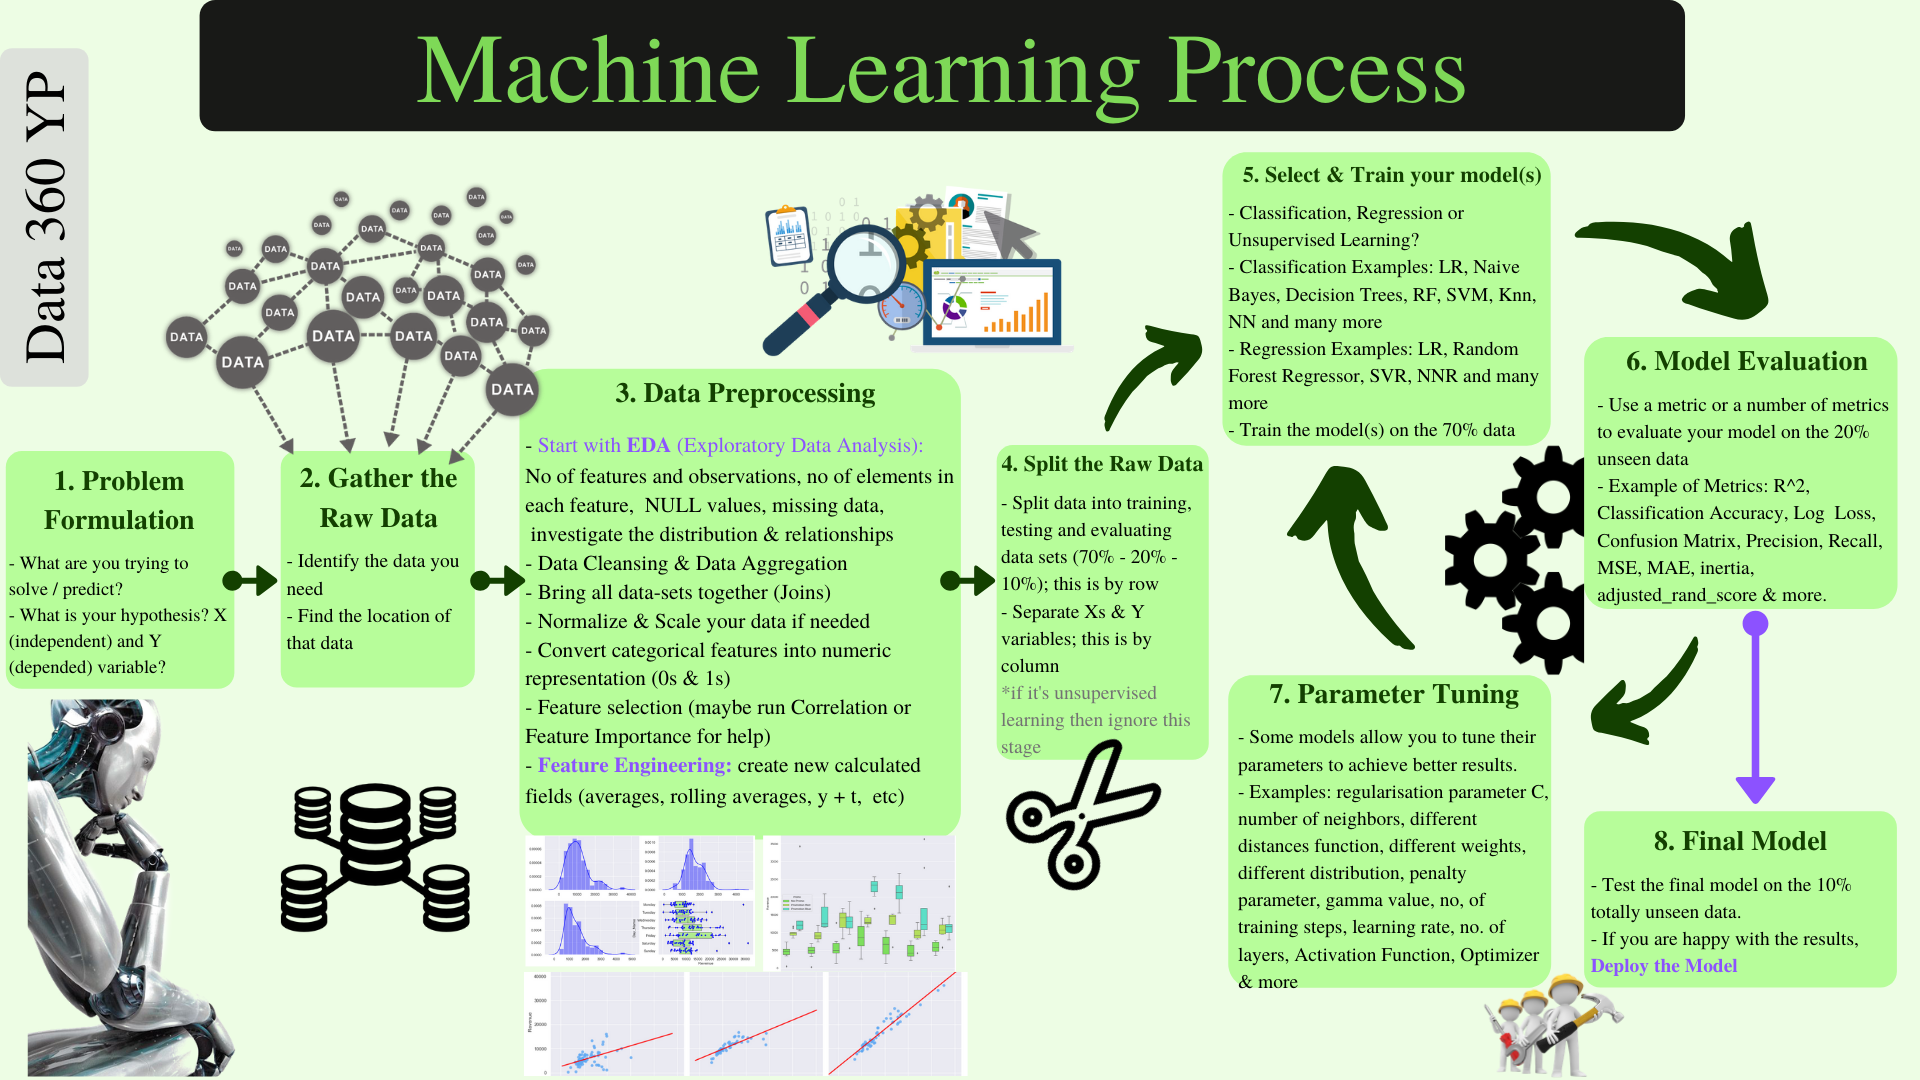

In [39]:
### Graphical ML Process

import os
from IPython.display import Image

Image(filename = "Machine Learning.png", width=900, height=900)

## 3. Problem formulation
In this example, we want to create a Segmentation with customers who behave the same

We want to investigate what are the common traits / behaviours in each Segment / Cluster

We want to deploy our results in Power BI for the business to use

We want to automate all this process for future data

## 4. Explaining how the whole automated process will work (Excel -> SQL -> Python -> SQL -> Power BI)

### Importing and Installing the Packages

In [6]:
# Packages/ Libraries 
import os #provides functions for intertemacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,confusion_matrix, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means
%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#import sys

## 5. Loading the Raw Data into Python

In [ ]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################


###  Loading the data using csv

In [9]:
raw_data = pd.read_csv("EventsRawData.csv")

#print the shape
print(raw_data.shape)

# run the first rows
raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


###  Loading the data by readig from SQL server

#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################

import pypyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-8L98FK0\MSSQLSERVER08;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

####### rynning the SQL quey i need
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Events_Raw_Data2]''', conn2)

#conn.close()



####### Viz
SQL_Query.head()

## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis & Data Cleaning

In [14]:
# Checking for null values

raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [18]:
# Visalise the NULL observations per column
raw_data[raw_data['Total_Household_Income'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset=['Total_Household_Income'])

# Printing the new shape after deleting rows with null values
print(raw_data.shape)

# Visualise the NULL observations if any
raw_data.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [25]:
# Investigate all the elements within each Feature inorder to gain a 
# better understanding of them--- numeric or categorical

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    num_values = len(unique_vals)  #number of unique values in returned array
    if num_values < 10:
        print('The the number of values for feature >> {} : {} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The the number of values for feature >> {} : {}'.format(column, num_values))

The the number of values for feature >> CUSTOMER : 14778
The the number of values for feature >> Age : 9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The the number of values for feature >> Gender : 2 -- ['Female' 'Male']
The the number of values for feature >> Postcode : 14674
The the number of values for feature >> District : 225
The the number of values for feature >> Constituency : 358
The the number of values for feature >> latitude : 13242
The the number of values for feature >> longitude : 13262
The the number of values for feature >> Current_Status : 8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The the number of values for feature >> Total_Household_Income : 8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The th

In [26]:
# Getting the columns we need for plotting 
# We shall have to exclude columns with more than 10 unique values
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

#### Show the counts of observations in each categorical bin using bars. 
A count plot can be thought of as a histogram across a categorical variable.

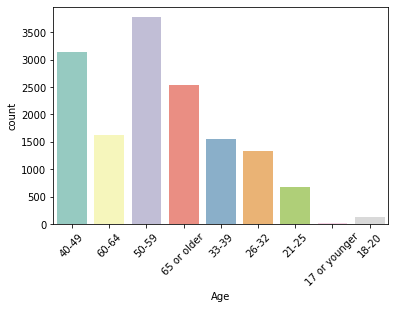

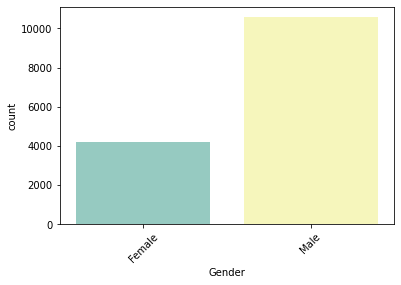

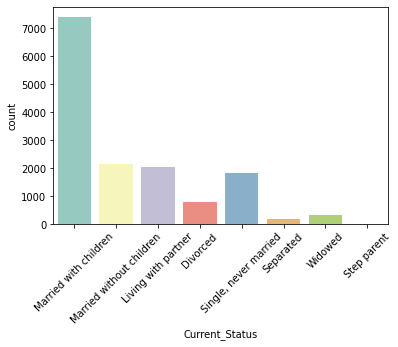

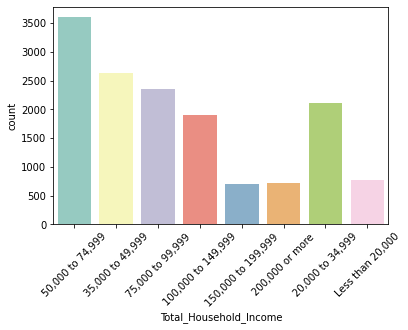

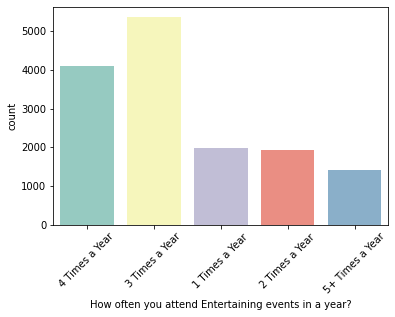

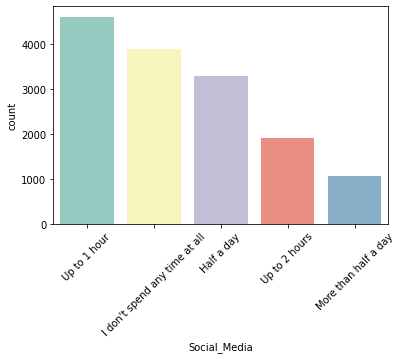

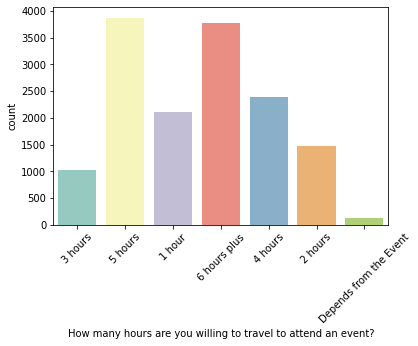

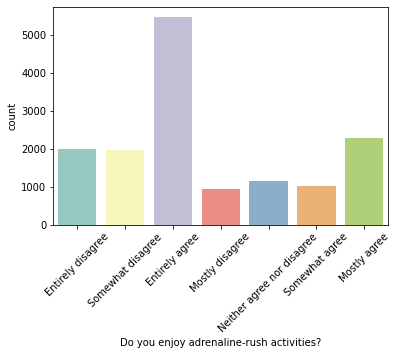

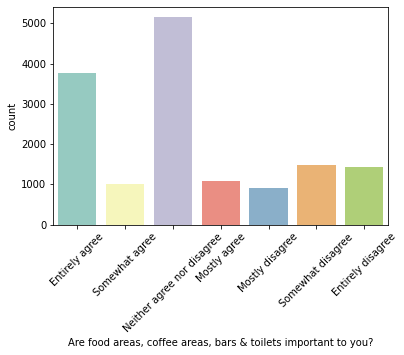

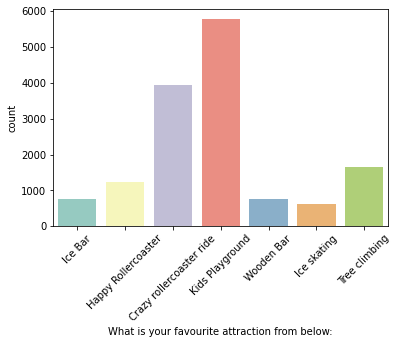

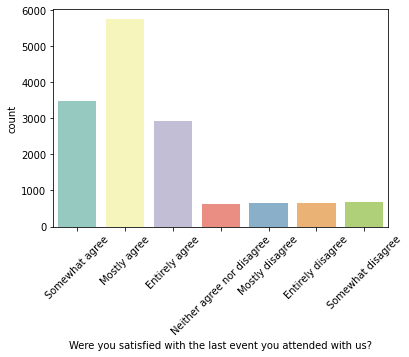

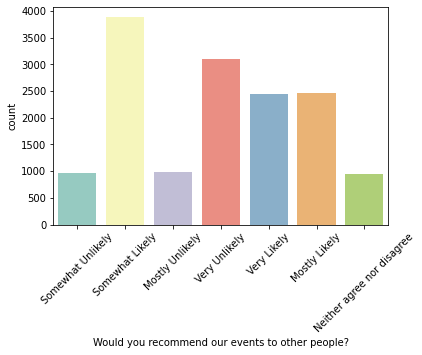

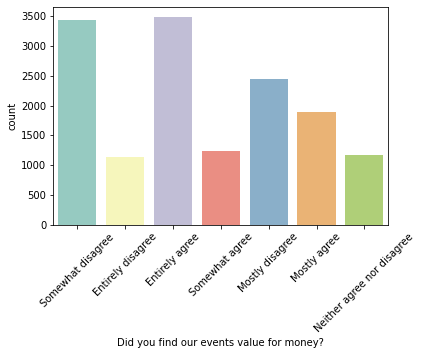

In [33]:
# Looping through all the features by our y variable - to see if there is a rrelationship
#

features = ['Age', 'Gender',
            'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

# Counting number of elements/customers per each column subcategory
for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3') # hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

### 5.3 Feature Engineering- Numeric Representation of Categorical Variables

In [36]:
# Making catgorical variables into numeric representation

print(raw_data.shape)

# keeping columns we need - Drop location columns for now as we do not want 
# them to impact our results (for now)

raw_data2 = raw_data[features]
print(raw_data2.shape)

# making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data2, columns = features)

# Notes:
# We can also do this with Label Encoing and OneHotEncoder from the preprocessing library

#print thee shape of the new df
print(new_raw_data.shape) # Number of cols increases as categorical vals are spread

new_raw_data.head()

(14778, 19)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


## 6.0 K-means Clustering


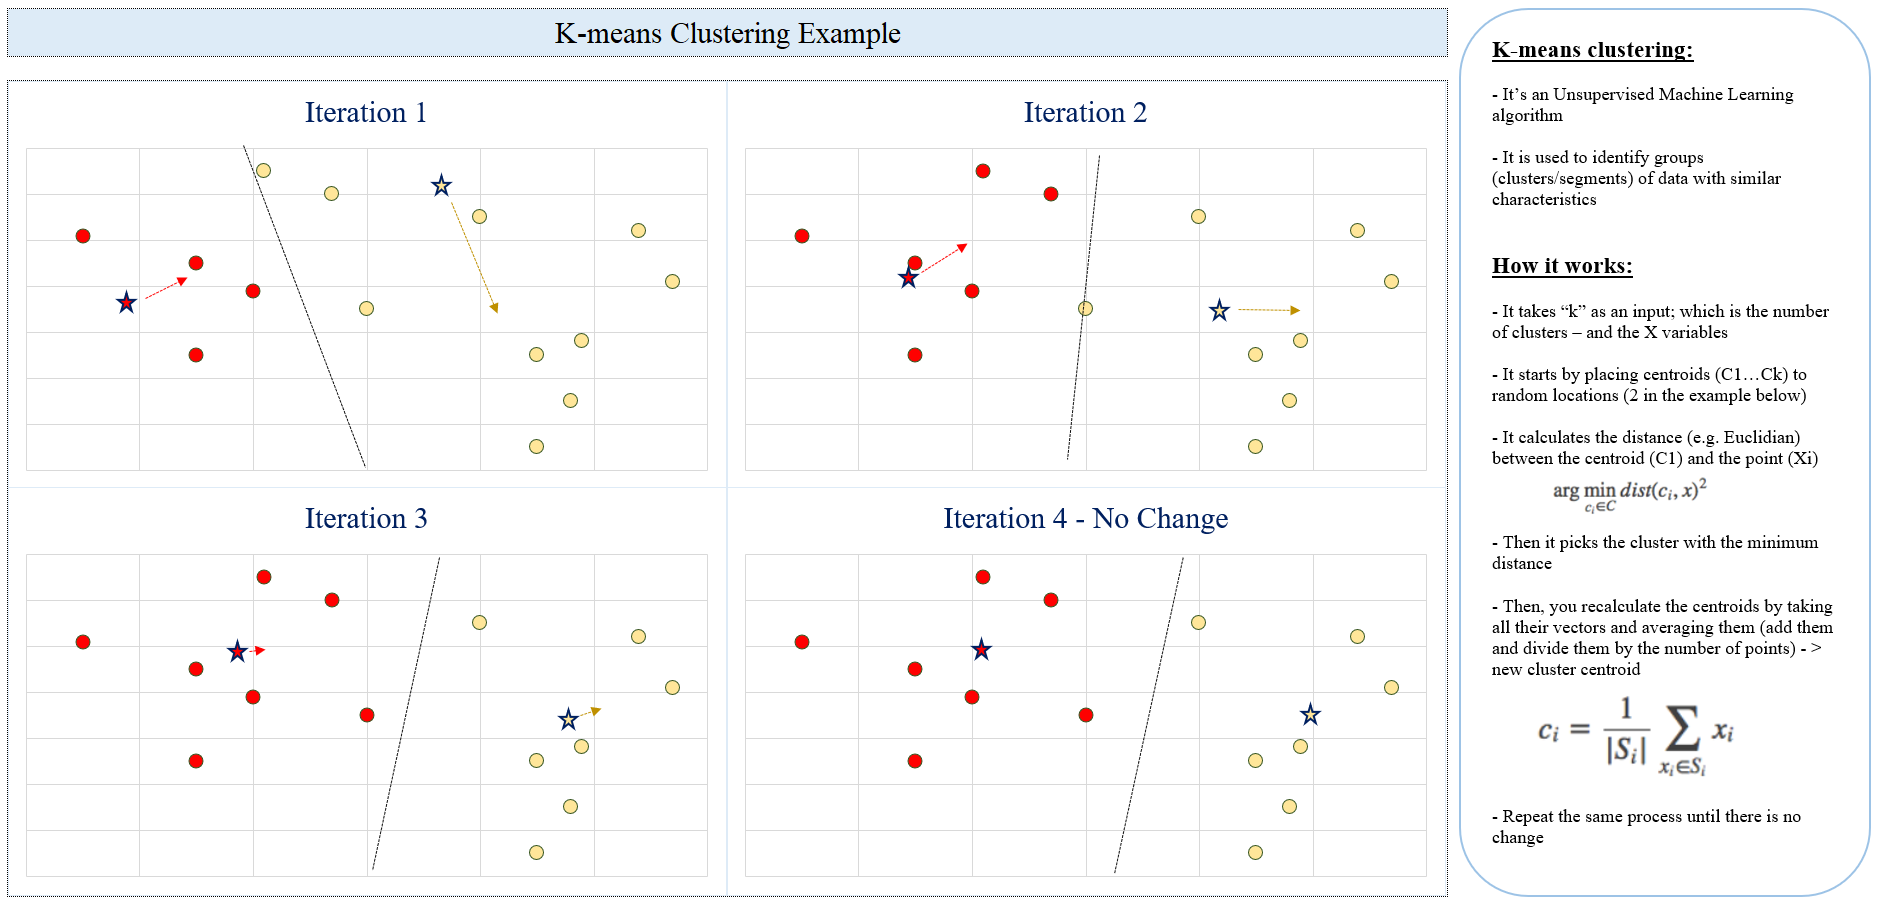

In [40]:
# Graphical Representation of KMeans

Image(filename = "kmeans_image.png", width=1000, height=1000)

In [45]:
# Running Kmeans

X_train = new_raw_data.values

# We will start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The  clusters are: ", kmeans.labels_)

# Print the Inertia
print("The Inertia is : ", kmeans.inertia_)


The  clusters are:  [0 4 4 ... 0 1 4]
The Inertia is :  101900.26594116465


In [43]:
kmeans.labels_.shape

(14778,)

### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric

In [55]:
# How to indentify/find the best number of Ks - clusters

# Running K means with multiple Ks
no_of_clusters = range(2,12) #[2,3,4,5,6,7,8,9,10,11]
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The Inertia for : ",f,  "Clusters is : ", u)

The Inertia for :  2 Clusters is :  125619.02972065938
The Inertia for :  3 Clusters is :  114905.38684266763
The Inertia for :  4 Clusters is :  106337.17594801619
The Inertia for :  5 Clusters is :  100865.16529237528
The Inertia for :  6 Clusters is :  96432.53526396495
The Inertia for :  7 Clusters is :  93814.4989763175
The Inertia for :  8 Clusters is :  91696.57513876229
The Inertia for :  9 Clusters is :  89725.00222083238
The Inertia for :  10 Clusters is :  88493.22915979309
The Inertia for :  11 Clusters is :  87581.06059954737


In [56]:
no_of_clusters

range(2, 12)

Text(0.5, 1.0, 'Inertia Plot per k')

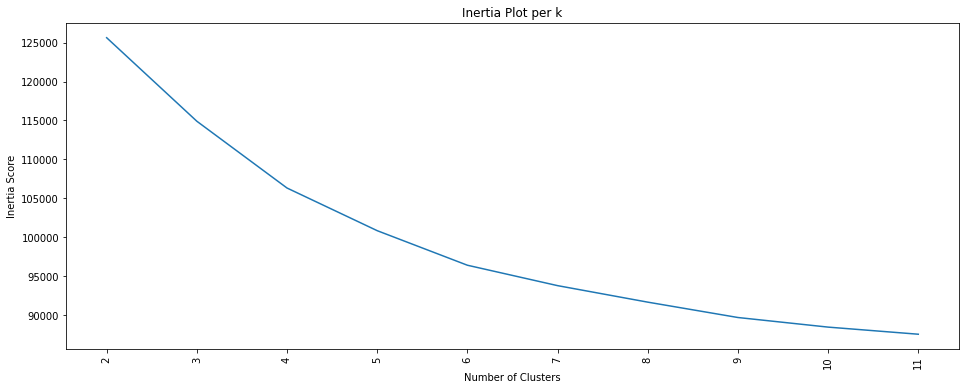

In [57]:
# Creating the scree plot for Inertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16, 6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per k')

In [58]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

# print array list
kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a dataframe
countscldf = pd.DataFrame(counts, columns=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987
